# **DATA IMPORTING & READING**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
data = pd.read_csv('/kaggle/input/aisdataset/AIS_2018_01_01.csv')

In [3]:
data.head()

MMSI         BaseDateTime       LAT       LON  SOG    COG  Heading  \
0  367773370  2018-01-01T08:01:11  35.08478 -90.10912  0.2  322.5    511.0   
1  367773370  2018-01-01T08:02:20  35.08475 -90.10913  1.0  194.8    511.0   
2  367773370  2018-01-01T08:03:21  35.08415 -90.10913  3.0  201.9    511.0   
3  367773370  2018-01-01T08:04:30  35.08261 -90.11096  6.9  237.9    511.0   
4  367773370  2018-01-01T08:05:40  35.08145 -90.11332  6.8  240.3    511.0   

    VesselName  IMO CallSign  VesselType  Status  Length  Width  Draft  Cargo  \
0  WALT WEPFER  NaN  WDJ3994        31.0     0.0    21.0    7.0    NaN    0.0   
1  WALT WEPFER  NaN  WDJ3994        31.0     0.0    21.0    7.0    NaN    0.0   
2  WALT WEPFER  NaN  WDJ3994        31.0     0.0    21.0    7.0    NaN    0.0   
3  WALT WEPFER  NaN  WDJ3994        31.0     0.0    21.0    7.0    NaN    0.0   
4  WALT WEPFER  NaN  WDJ3994        31.0     0.0    21.0    7.0    NaN    0.0   

  TransceiverClass  
0                A  
1                A  
2                A  
3                A  
4                A

In [4]:
data.tail()

MMSI         BaseDateTime       LAT        LON  SOG    COG  \
7241771  367796190  2018-01-01T13:38:07  13.46116  144.66447  0.0  360.0   
7241772  367796190  2018-01-01T13:53:07  13.46124  144.66445  0.0  360.0   
7241773  367796190  2018-01-01T13:58:37  13.46123  144.66445  0.0  360.0   
7241774  367796190  2018-01-01T13:19:17  13.46116  144.66445  0.0  360.0   
7241775  367796190  2018-01-01T10:11:47  13.46123  144.66444  0.0  360.0   

         Heading VesselName         IMO CallSign  VesselType  Status  Length  \
7241771    511.0    AGILITY  IMO9320984  WDJ6282        31.0     0.0     NaN   
7241772    511.0    AGILITY  IMO9320984  WDJ6282        31.0     0.0     NaN   
7241773    511.0    AGILITY  IMO9320984  WDJ6282        31.0     0.0     NaN   
7241774    511.0    AGILITY  IMO9320984  WDJ6282        31.0     0.0     NaN   
7241775    511.0    AGILITY  IMO9320984  WDJ6282        31.0     0.0     NaN   

         Width  Draft  Cargo TransceiverClass  
7241771    NaN    NaN    NaN                A  
7241772    NaN    NaN    NaN                A  
7241773    NaN    NaN    NaN                A  
7241774    NaN    NaN    NaN                A  
7241775    NaN    NaN    NaN                A

In [5]:
data.columns

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading',
       'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status', 'Length',
       'Width', 'Draft', 'Cargo', 'TransceiverClass'],
      dtype='object')

In [6]:
data.describe()

MMSI           LAT           LON           SOG           COG  \
count  7.241776e+06  7.241776e+06  7.241776e+06  7.241776e+06  7.241776e+06   
mean   3.678543e+08  3.507151e+01 -9.542921e+01  1.918269e+00  2.068856e+02   
std    5.923441e+07  8.251780e+00  2.144845e+01  5.101726e+00  1.085929e+02   
min    0.000000e+00  1.105353e+01 -1.794920e+02  0.000000e+00  0.000000e+00   
25%    3.669339e+08  2.965943e+01 -9.722503e+01  0.000000e+00  1.237000e+02   
50%    3.673305e+08  3.212671e+01 -9.034384e+01  0.000000e+00  2.317000e+02   
75%    3.676397e+08  4.043342e+01 -8.130796e+01  3.000000e-01  2.917000e+02   
max    1.004847e+09  8.703831e+01  1.477592e+02  1.023000e+02  3.600000e+02   

            Heading    VesselType        Status        Length         Width  \
count  7.241776e+06  6.992334e+06  6.028844e+06  6.477024e+06  5.371636e+06   
mean   3.714976e+02  4.420630e+01  3.735907e+00  5.272321e+01  1.207458e+01   
std    1.779615e+02  2.027678e+01  5.730263e+00  6.838644e+01  9.558568e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.280000e+02  3.100000e+01  0.000000e+00  1.900000e+01  7.000000e+00   
50%    5.110000e+02  3.100000e+01  0.000000e+00  2.500000e+01  9.000000e+00   
75%    5.110000e+02  6.000000e+01  5.000000e+00  4.300000e+01  1.200000e+01   
max    5.110000e+02  9.900000e+01  1.500000e+01  3.680000e+02  1.260000e+02   

              Draft         Cargo  
count  2.095922e+06  2.819240e+06  
mean   6.642576e+00  4.728067e+01  
std    4.468193e+00  2.280618e+01  
min   -1.260000e+01  0.000000e+00  
25%    3.500000e+00  3.100000e+01  
50%    4.800000e+00  5.200000e+01  
75%    1.000000e+01  6.000000e+01  
max    2.270000e+01  1.660000e+02

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241776 entries, 0 to 7241775
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   MMSI              int64  
 1   BaseDateTime      object 
 2   LAT               float64
 3   LON               float64
 4   SOG               float64
 5   COG               float64
 6   Heading           float64
 7   VesselName        object 
 8   IMO               object 
 9   CallSign          object 
 10  VesselType        float64
 11  Status            float64
 12  Length            float64
 13  Width             float64
 14  Draft             float64
 15  Cargo             float64
 16  TransceiverClass  object 
dtypes: float64(11), int64(1), object(5)
memory usage: 939.3+ MB


In [8]:
data.dtypes

MMSI                  int64
BaseDateTime         object
LAT                 float64
LON                 float64
SOG                 float64
COG                 float64
Heading             float64
VesselName           object
IMO                  object
CallSign             object
VesselType          float64
Status              float64
Length              float64
Width               float64
Draft               float64
Cargo               float64
TransceiverClass     object
dtype: object

/tmp/ipykernel_397/570547489.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


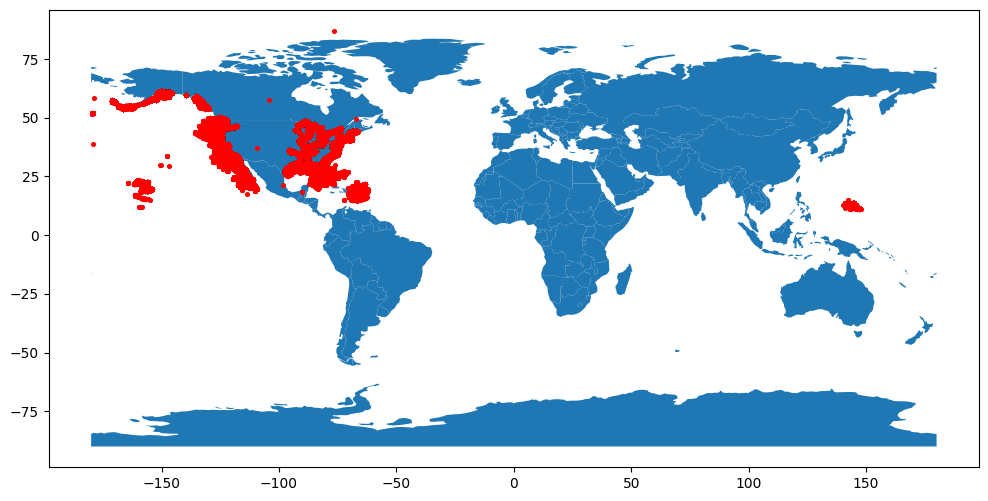

In [9]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(data['LON'], data['LAT'])]
gdf = GeoDataFrame(data, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#plt.axis([-200,-150,0,90])
gdf.plot(ax=world.plot(figsize=(12, 16)), marker='o', color='red', markersize=7);

In [ ]:
lats_long = []
for i in range(len(data)):
    lats_long.append((data['LAT'][i], data['LON'][i]))
    
print(lats_long)

In [58]:
df_geometry = pd.DataFrame(lats_long, columns=['latitude', 'longitude'])

df_geometry['geometry'] = df_geometry.apply(lambda row: f"POINT ({row['latitude']} {row['longitude']})", axis=1)

data['geometry'] = df_geometry['geometry']

print(data.head())

        MMSI        BaseDateTime       LAT       LON  SOG    COG  Heading  \
0  367773370 2018-01-01 08:01:11  35.08478 -90.10912  0.2  322.5    511.0   
1  367773370 2018-01-01 08:02:20  35.08475 -90.10913  1.0  194.8    511.0   
2  367773370 2018-01-01 08:03:21  35.08415 -90.10913  3.0  201.9    511.0   
3  367773370 2018-01-01 08:04:30  35.08261 -90.11096  6.9  237.9    511.0   
4  367773370 2018-01-01 08:05:40  35.08145 -90.11332  6.8  240.3    511.0   

    VesselName         IMO CallSign  VesselType  Status  Length  Width  Draft  \
0  WALT WEPFER  IMO7042899  WDJ3994        31.0     0.0    21.0    7.0    0.0   
1  WALT WEPFER  IMO7042899  WDJ3994        31.0     0.0    21.0    7.0    0.0   
2  WALT WEPFER  IMO7042899  WDJ3994        31.0     0.0    21.0    7.0    0.0   
3  WALT WEPFER  IMO7042899  WDJ3994        31.0     0.0    21.0    7.0    0.0   
4  WALT WEPFER  IMO7042899  WDJ3994        31.0     0.0    21.0    7.0    0.0   

   Cargo TransceiverClass                    geome

In [59]:
lat_mean = data['LAT'].mean()
lat_mean

35.07151031038381

In [60]:
long_mean = data['LON'].mean()
long_mean

-95.42921204585181

In [61]:
value_count = data['Length'].value_counts()
value_count

Length
21.000000     368162
23.000000     305205
18.000000     303939
17.000000     295929
22.000000     270125
               ...  
36.065574          1
36.114754          1
36.163934          1
36.213115          1
175.379747         1
Name: count, Length: 43909, dtype: int64

In [62]:
mode = data['Length'].mode()
mode = mode[0]
mode

21.0

In [63]:
print("The average track length is "+str(mode))

The average track length is 21.0


In [64]:
corr1 = round(data['SOG'].corr(data['VesselType']),2)
print("The correlation b/w SOG and vessel type is "+str(corr1)+" that is very small, so we can say that SOG does not vary depending upon vessel type.")

The correlation b/w SOG and vessel type is 0.18 that is very small, so we can say that SOG does not vary depending upon vessel type.


In [65]:
corr2 = round(data['COG'].corr(data['VesselType']),2)
print("The correlation b/w COG and vessel type is "+str(corr2)+" that is also very small, so we can say that COG does not vary depending upon vessel type.")

The correlation b/w COG and vessel type is -0.04 that is also very small, so we can say that COG does not vary depending upon vessel type.


In [66]:
corr3 = round(data['Length'].corr(data['SOG']),2)
print("The correlation b/w Length and SOG is "+str(corr3)+" so we can say that vessel length modify SOG around 10%")

The correlation b/w Length and SOG is 0.33 so we can say that vessel length modify SOG around 10%


In [67]:
corr4 = round(data['Length'].corr(data['COG']),2)
print("The correlation b/w Length and COG is "+str(corr4)+" so we can say that vessel length modify COG around 16%.")

The correlation b/w Length and COG is -0.05 so we can say that vessel length modify COG around 16%.


In [68]:
corr5 = round(data['Width'].corr(data['SOG']),2)
print("The correlation b/w Width and SOG is "+str(corr5)+" so we can say that vessel width modify SOG around 12%.")

The correlation b/w Width and SOG is 0.27 so we can say that vessel width modify SOG around 12%.


In [69]:
corr6 = round(data['Width'].corr(data['COG']),2)
print("The correlation b/w Width and COG is "+str(corr6)+" so we can say that vessel width modify COG around 13%.")

The correlation b/w Width and COG is -0.03 so we can say that vessel width modify COG around 13%.


In [70]:
value_count = data['SOG'].value_counts()
value_count

SOG
0.0      4643867
0.1       656095
0.2       118334
0.3        62496
0.4        44042
          ...   
51.4           1
100.3          1
49.6           1
70.8           1
88.7           1
Name: count, Length: 475, dtype: int64

In [71]:
mode = data['SOG'].mode()
mode = mode[0]
mode

0.0

In [72]:
print('The avg speed of ships are '+str(mode))

The avg speed of ships are 0.0


In [73]:
data['BaseDateTime'].dtype # 

dtype('<M8[ns]')

In [74]:
data['BaseDateTime'].head()

0   2018-01-01 08:01:11
1   2018-01-01 08:02:20
2   2018-01-01 08:03:21
3   2018-01-01 08:04:30
4   2018-01-01 08:05:40
Name: BaseDateTime, dtype: datetime64[ns]

In [75]:
data['BaseDateTime'] =  pd.to_datetime(data['BaseDateTime'])

In [76]:
data['BaseDateTime'].dtype

dtype('<M8[ns]')

In [77]:
pd.DatetimeIndex(data['BaseDateTime']).year

Index([2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       ...
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
      dtype='int32', name='BaseDateTime', length=7241776)

In [78]:
pd.DatetimeIndex(data['BaseDateTime']).month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int32', name='BaseDateTime', length=7241776)

In [79]:
pd.DatetimeIndex(data['BaseDateTime']).day

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int32', name='BaseDateTime', length=7241776)

In [80]:
pd.DatetimeIndex(data['BaseDateTime']).hour

Index([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
       ...
       14, 15, 15, 15, 15, 13, 13, 13, 13, 10],
      dtype='int32', name='BaseDateTime', length=7241776)

In [81]:
pd.DatetimeIndex(data['BaseDateTime']).minute

Index([ 1,  2,  3,  4,  5,  6,  8,  9, 10, 11,
       ...
       56,  4,  5,  8, 18, 38, 53, 58, 19, 11],
      dtype='int32', name='BaseDateTime', length=7241776)

In [82]:
pd.DatetimeIndex(data['BaseDateTime']).second

Index([11, 20, 21, 30, 40, 51,  0, 11, 21, 31,
       ...
        7, 38, 48,  8, 28,  7,  7, 37, 17, 47],
      dtype='int32', name='BaseDateTime', length=7241776)


# **Data Cleaning**

In [83]:
data.isnull().any()

MMSI                False
BaseDateTime        False
LAT                 False
LON                 False
SOG                 False
COG                 False
Heading             False
VesselName          False
IMO                 False
CallSign            False
VesselType          False
Status              False
Length              False
Width               False
Draft               False
Cargo               False
TransceiverClass    False
geometry            False
dtype: bool

In [84]:
missing_values_columns = data.columns[data.isnull().any()].tolist()
missing_values_columns

[]

In [85]:
data['VesselName'].isnull().sum()

0

In [86]:
count_missing_values = []
for i in missing_values_columns:
    count = data[i].isnull().sum()
    count_missing_values.append(count)
    

missing_values_record = pd.DataFrame({'Column name': missing_values_columns,
                                     'Missing Value Count': count_missing_values})

missing_values_record

Empty DataFrame
Columns: [Column name, Missing Value Count]
Index: []

In [87]:
data = data.interpolate(method ='linear', limit_direction ='forward') 
data = data.interpolate(method='linear', axis=0).ffill().bfill()

/tmp/ipykernel_397/1405533224.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate(method ='linear', limit_direction ='forward')
/tmp/ipykernel_397/1405533224.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate(method='linear', axis=0).ffill().bfill()


In [88]:
count_missing_values = []
for i in missing_values_columns:
    count = data[i].isnull().sum()
    count_missing_values.append(count)
    

missing_values_record = pd.DataFrame({'Column name': missing_values_columns,
                                     'Missing Value Count': count_missing_values})

missing_values_record

Empty DataFrame
Columns: [Column name, Missing Value Count]
Index: []

# ***CREATING ML MODEL for ANOMALY/DISTRESS DETECTION***

In [89]:
data['MMSI'].value_counts()

MMSI
572912210    1378
367375120    1376
316031266    1375
316025785    1375
367314530    1369
             ... 
338243696       1
339807000       1
235087417       1
367603060       1
538071195       1
Name: count, Length: 12240, dtype: int64

In [90]:
track1 = data[data['MMSI'] == 572912210]
track1.head()

MMSI        BaseDateTime       LAT       LON  SOG    COG  \
4975740  572912210 2018-01-01 02:54:34  29.88112 -89.95583  0.2   10.9   
4975742  572912210 2018-01-01 02:55:37  29.88116 -89.95582  0.1   34.2   
4975744  572912210 2018-01-01 02:56:38  29.88118 -89.95580  0.1   54.9   
4975747  572912210 2018-01-01 02:52:29  29.88104 -89.95587  0.0  164.7   
4975753  572912210 2018-01-01 02:53:30  29.88107 -89.95585  0.1   26.5   

         Heading VesselName         IMO CallSign  VesselType  Status  Length  \
4975740     65.0    NEPTUNE  IMO9640413    T2ZG4        70.0     1.0   179.0   
4975742     67.0    NEPTUNE  IMO9640413    T2ZG4        70.0     1.0   179.0   
4975744     67.0    NEPTUNE  IMO9640413    T2ZG4        70.0     1.0   179.0   
4975747     64.0    NEPTUNE  IMO9640413    T2ZG4        70.0     1.0   179.0   
4975753     64.0    NEPTUNE  IMO9640413    T2ZG4        70.0     1.0   179.0   

         Width  Draft  Cargo TransceiverClass                    geometry  
4975740   28.0   10.3   31.0                A  POINT (29.88112 -89.95583)  
4975742   28.0   10.3   31.0                A  POINT (29.88116 -89.95582)  
4975744   28.0   10.3   31.0                A   POINT (29.88118 -89.9558)  
4975747   28.0   10.3   31.0                A  POINT (29.88104 -89.95587)  
4975753   28.0   10.3   31.0                A  POINT (29.88107 -89.95585)

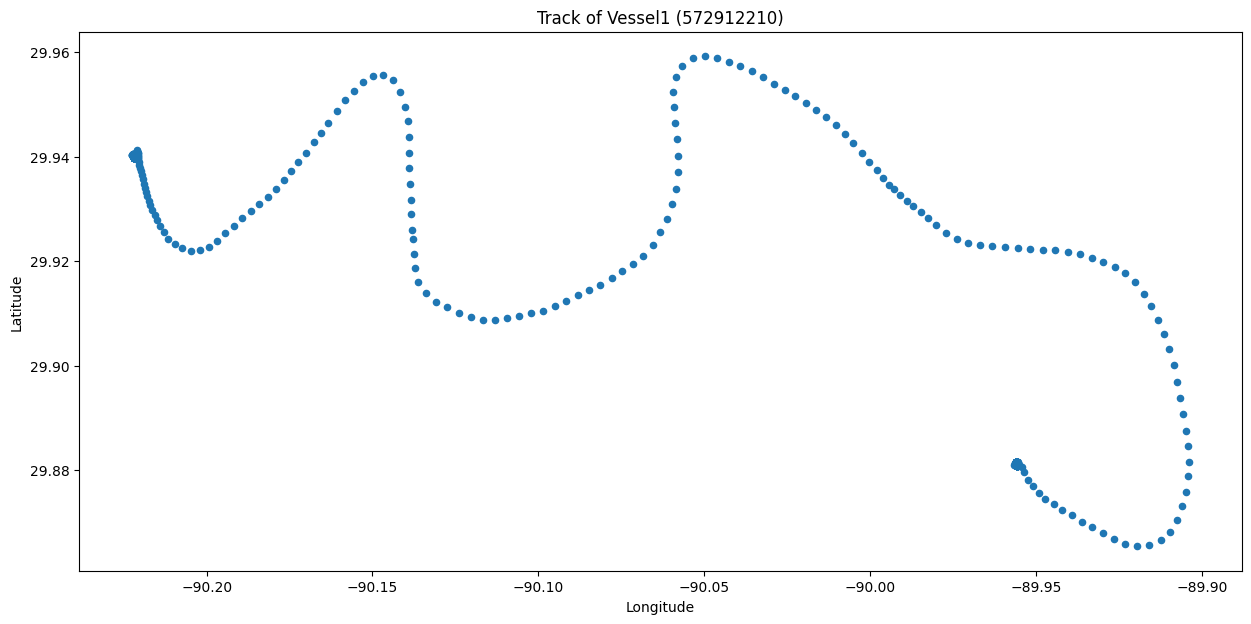

In [91]:
import matplotlib.pyplot as plt
track1.plot(kind = 'scatter', x = 'LON', y = 'LAT', figsize=(15,7))

plt.title("Track of Vessel1 (572912210)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [92]:
track2 = data[data['MMSI'] == 367375120]
track2.head()

MMSI        BaseDateTime       LAT        LON  SOG    COG  \
3687344  367375120 2018-01-01 01:07:16  60.54442 -145.76496  0.0    0.0   
3687345  367375120 2018-01-01 01:05:12  60.54445 -145.76499  0.0    0.0   
3687346  367375120 2018-01-01 01:06:14  60.54445 -145.76499  0.0    0.0   
3687347  367375120 2018-01-01 01:03:08  60.54445 -145.76502  0.0    0.0   
3687348  367375120 2018-01-01 01:04:10  60.54443 -145.76499  0.0  193.4   

         Heading       VesselName         IMO CallSign  VesselType  Status  \
3687344     97.0  PACIFIC SOJOURN  IMO8856431  WDE6045        30.0     0.0   
3687345     98.0  PACIFIC SOJOURN  IMO8856431  WDE6045        30.0     0.0   
3687346    100.0  PACIFIC SOJOURN  IMO8856431  WDE6045        30.0     0.0   
3687347     98.0  PACIFIC SOJOURN  IMO8856431  WDE6045        30.0     0.0   
3687348     99.0  PACIFIC SOJOURN  IMO8856431  WDE6045        30.0     0.0   

         Length  Width      Draft  Cargo TransceiverClass  \
3687344    18.0    7.0  11.418519   99.0                A   
3687345    18.0    7.0  11.492593   99.0                A   
3687346    18.0    7.0  11.566667   99.0                A   
3687347    18.0    7.0  11.640741   99.0                A   
3687348    18.0    7.0  11.714815   99.0                A   

                            geometry  
3687344  POINT (60.54442 -145.76496)  
3687345  POINT (60.54445 -145.76499)  
3687346  POINT (60.54445 -145.76499)  
3687347  POINT (60.54445 -145.76502)  
3687348  POINT (60.54443 -145.76499)

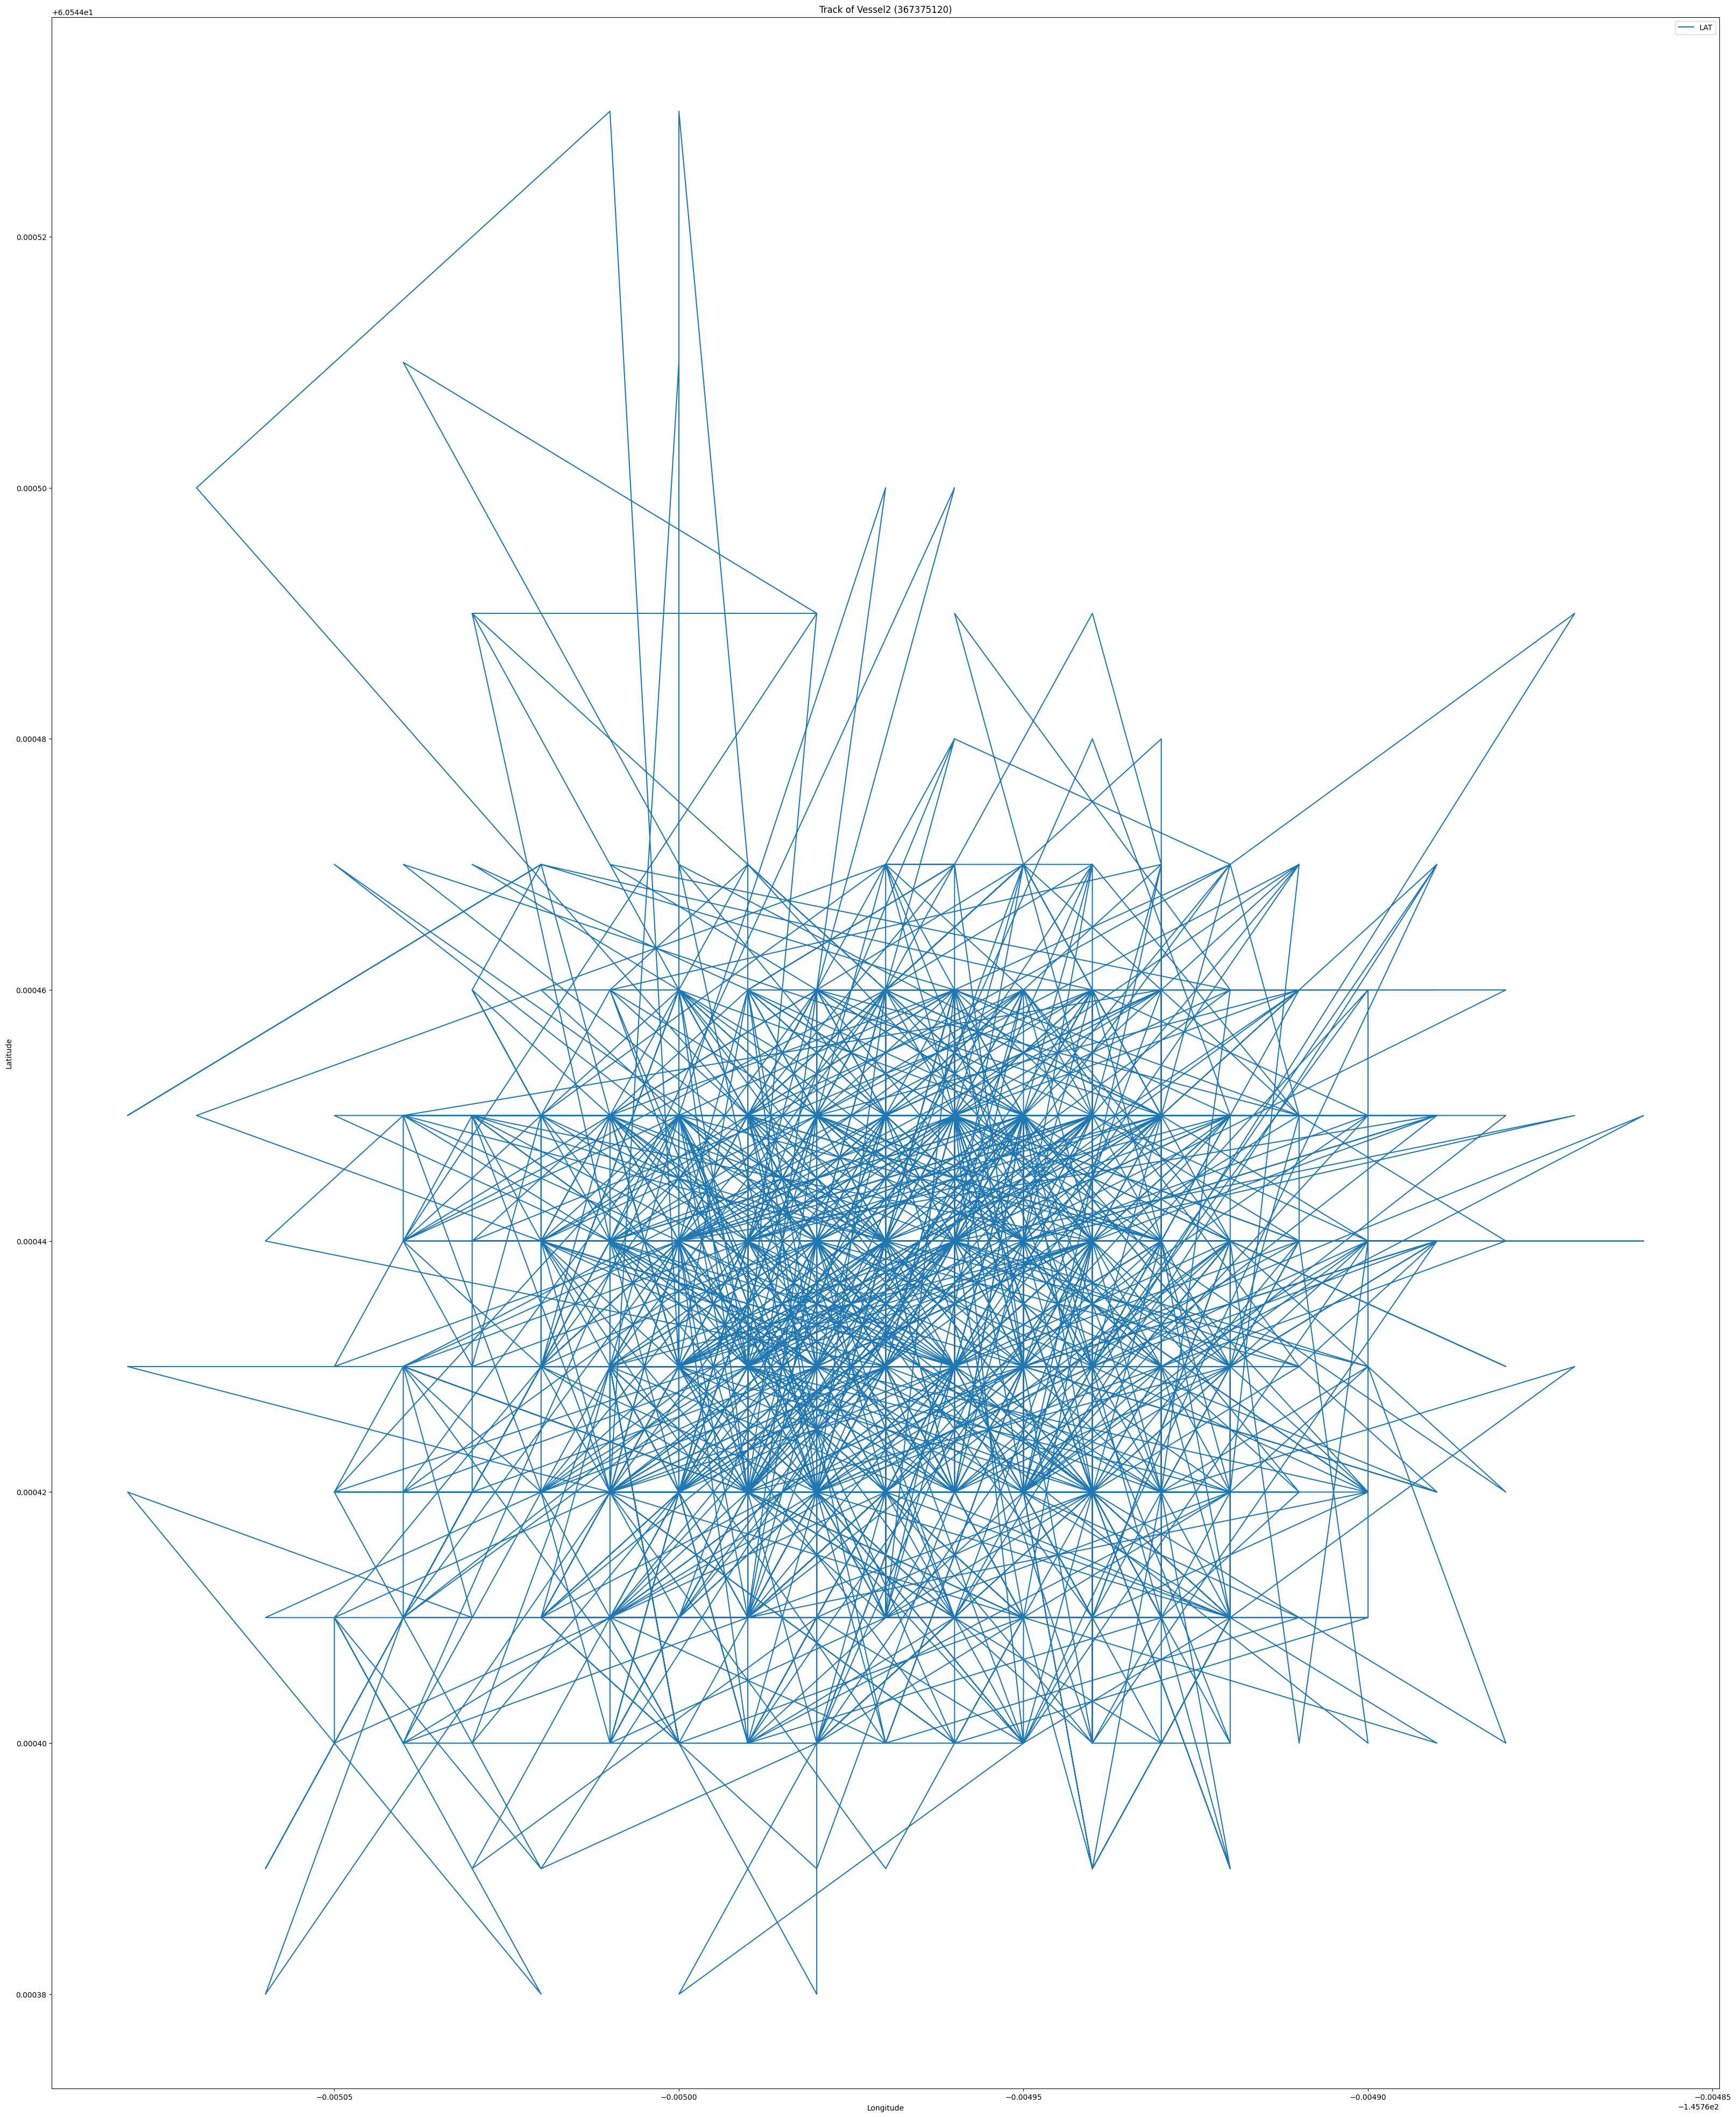

In [93]:
import matplotlib.pyplot as plt
track2.plot(kind = 'line', x = 'LON', y = 'LAT', figsize=(40,50))

plt.title("Track of Vessel2 (367375120)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [94]:
track3 = data[data['MMSI'] == 316031266]
track3.head()

MMSI        BaseDateTime       LAT        LON  SOG    COG  \
2563239  316031266 2018-01-01 08:34:18  48.65275 -123.39372  0.0  182.7   
2563243  316031266 2018-01-01 08:33:16  48.65275 -123.39373  0.0  182.7   
2563246  316031266 2018-01-01 08:31:12  48.65275 -123.39373  0.0  182.7   
2563247  316031266 2018-01-01 08:32:14  48.65274 -123.39372  0.0  182.7   
2563248  316031266 2018-01-01 08:36:22  48.65276 -123.39373  0.0  182.7   

         Heading  VesselName         IMO CallSign  VesselType  Status  Length  \
2563239    511.0  BARRINGTON  IMO8990990  WDC3559         0.0    15.0    38.0   
2563243    511.0  BARRINGTON  IMO8990990  WDH3050         0.0    15.0    32.0   
2563246    511.0  BARRINGTON  IMO8990990  WDC3559         0.0    15.0    44.0   
2563247    511.0  BARRINGTON  IMO8990990  WDC3559         0.0    15.0    44.0   
2563248    511.0  BARRINGTON  IMO8990990  WDC3559         0.0    15.0    44.0   

         Width  Draft  Cargo TransceiverClass                     geometry  
2563239    9.0    2.0    0.0                A  POINT (48.65275 -123.39372)  
2563243    9.0    2.0    0.0                A  POINT (48.65275 -123.39373)  
2563246    9.0    2.0    0.0                A  POINT (48.65275 -123.39373)  
2563247    9.0    2.0    0.0                A  POINT (48.65274 -123.39372)  
2563248    9.0    2.0    0.0                A  POINT (48.65276 -123.39373)

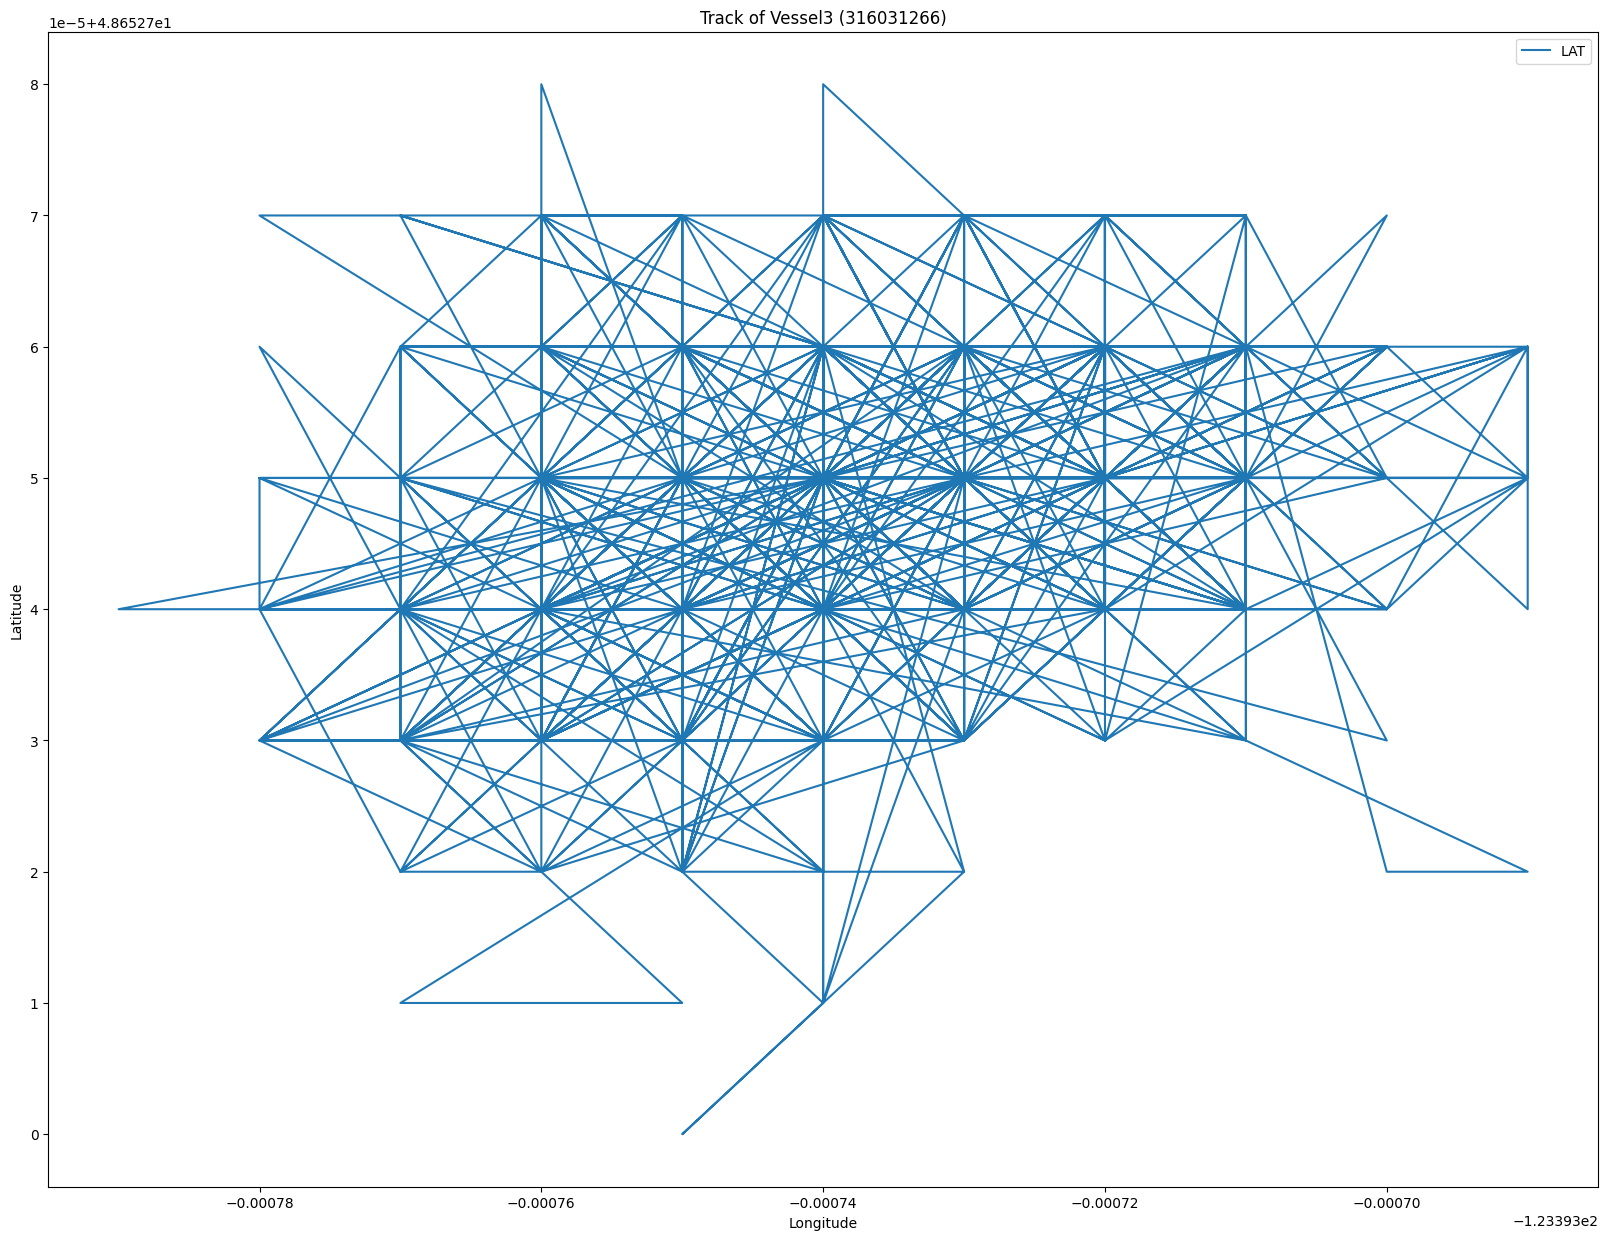

In [95]:
import matplotlib.pyplot as plt
track3.plot(kind = 'line', x = 'LON', y = 'LAT', figsize=(20,15))

plt.title("Track of Vessel3 (316031266)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## **SVM** ##

In [96]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [97]:
numpy.random.seed(7)

In [98]:
year = pd.DatetimeIndex(track1['BaseDateTime']).year.tolist()

month = pd.DatetimeIndex(track1['BaseDateTime']).month.tolist()

day = pd.DatetimeIndex(track1['BaseDateTime']).day.tolist()

hour = pd.DatetimeIndex(track1['BaseDateTime']).hour.tolist()

minute = pd.DatetimeIndex(track1['BaseDateTime']).minute.tolist()

track1['Year'] = year
track1['month'] = month 
track1['day'] = day
track1['hour'] = hour
track1['minute'] = minute

/tmp/ipykernel_397/508062469.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track1['Year'] = year
/tmp/ipykernel_397/508062469.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track1['month'] = month
/tmp/ipykernel_397/508062469.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [99]:
track1.columns

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading',
       'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status', 'Length',
       'Width', 'Draft', 'Cargo', 'TransceiverClass', 'geometry', 'Year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

In [114]:
track1.drop(['IMO', 'VesselName', 'CallSign', 'TransceiverClass'], axis = 1, inplace = True)

In [115]:
track1.columns

Index(['MMSI', 'LAT', 'LON', 'SOG', 'COG', 'Heading', 'VesselType', 'Status',
       'Length', 'Width', 'Draft', 'Cargo', 'Year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [116]:
print(track1.dtypes)

MMSI            int64
LAT           float64
LON           float64
SOG           float64
COG           float64
Heading       float64
VesselType    float64
Status        float64
Length        float64
Width         float64
Draft         float64
Cargo         float64
Year            int64
month           int64
day             int64
hour            int64
minute          int64
dtype: object


In [117]:
import numpy as np

non_numeric_columns = track1.select_dtypes(exclude=[np.number]).columns

for col in non_numeric_columns:
    print(f"Unique values in {col}: {track1[col].unique()}")
    
track1['VesselType'] = pd.to_numeric(track1['VesselType'], errors='coerce')
track1['Status'] = pd.to_numeric(track1['Status'], errors='coerce')

numeric_columns = track1.select_dtypes(include=[np.number]).columns

track1[numeric_columns] = track1[numeric_columns].apply(pd.to_numeric, errors='coerce')

correlation = track1.corrwith(track1['SOG']).sort_values(ascending=False)

print(correlation)

SOG           1.000000e+00
LAT           3.691391e-01
Heading       3.628017e-01
hour          3.409599e-01
COG           2.353554e-01
Draft         6.368780e-16
minute       -2.312466e-02
LON          -1.170015e-01
Status       -3.454419e-01
MMSI                   NaN
VesselType             NaN
Length                 NaN
Width                  NaN
Cargo                  NaN
Year                   NaN
month                  NaN
day                    NaN
dtype: float64


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [118]:
track1.corrwith(track1.SOG).sort_values(ascending=False)

SOG           1.000000e+00
LAT           3.691391e-01
Heading       3.628017e-01
hour          3.409599e-01
COG           2.353554e-01
Draft         6.368780e-16
minute       -2.312466e-02
LON          -1.170015e-01
Status       -3.454419e-01
MMSI                   NaN
VesselType             NaN
Length                 NaN
Width                  NaN
Cargo                  NaN
Year                   NaN
month                  NaN
day                    NaN
dtype: float64

<Axes: title={'center': 'Correlation with class'}>

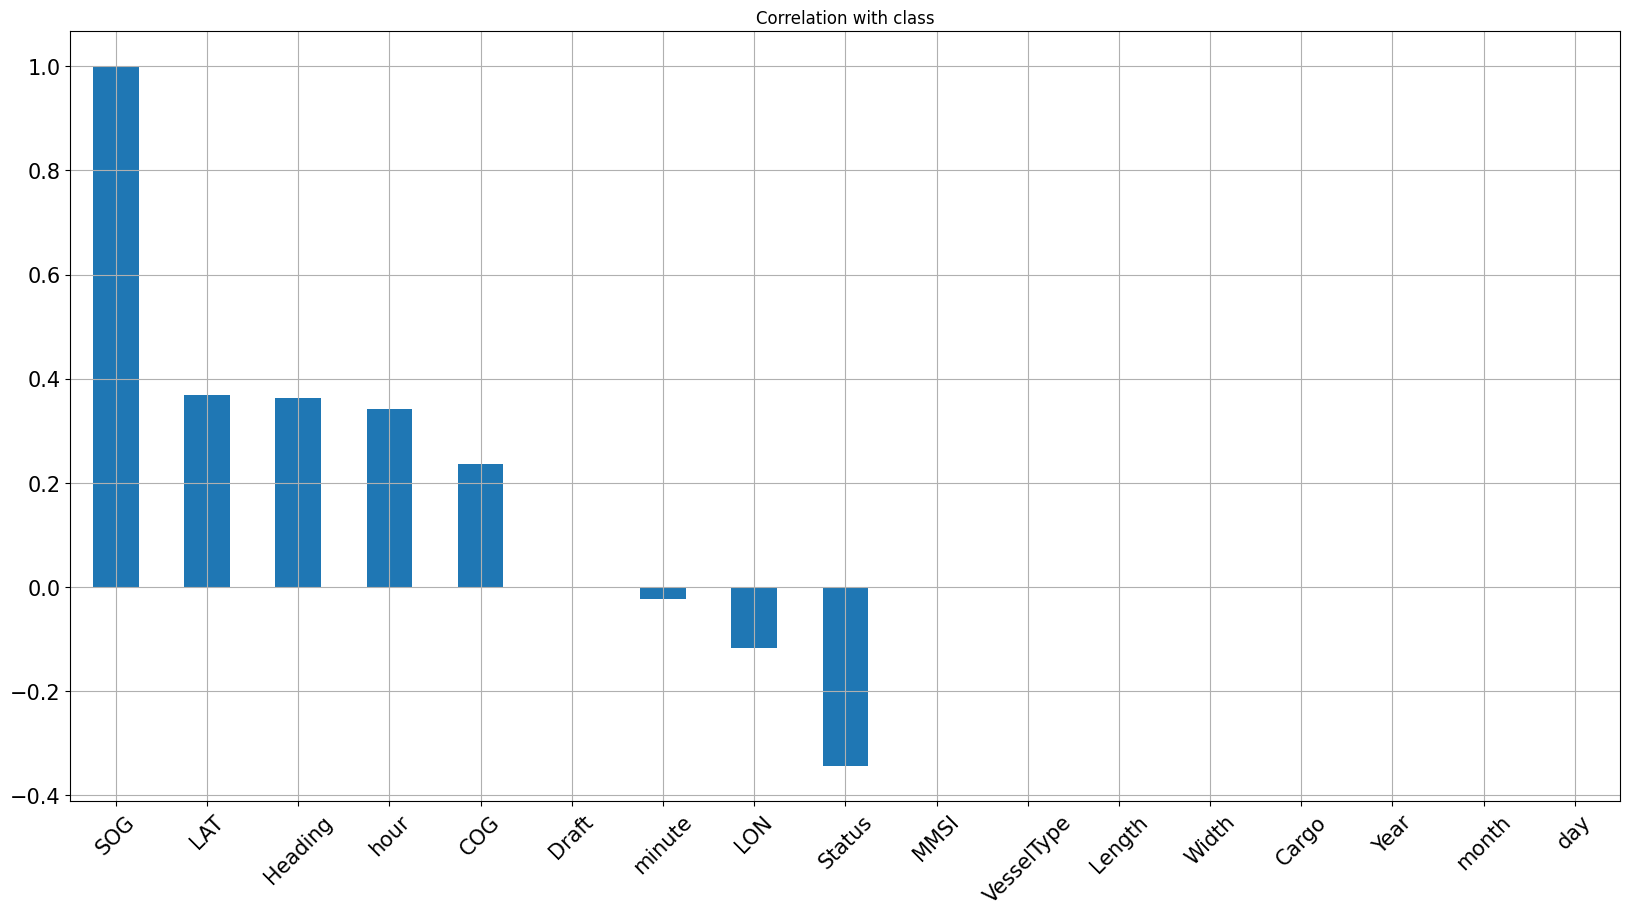

In [119]:
track1.corrwith(track1.SOG).sort_values(ascending=False).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

In [120]:
y = track1['SOG'].ravel()
y

/tmp/ipykernel_397/94199106.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = track1['SOG'].ravel()


array([0.2, 0.1, 0.1, ..., 0.1, 0.1, 0.2])

In [121]:
X = track1[['LAT', 'hour','Cargo', 'COG']]

In [122]:
X

LAT  hour  Cargo    COG
4975740  29.88112     2   31.0   10.9
4975742  29.88116     2   31.0   34.2
4975744  29.88118     2   31.0   54.9
4975747  29.88104     2   31.0  164.7
4975753  29.88107     2   31.0   26.5
...           ...   ...    ...    ...
5002748  29.94006    20   31.0  226.6
5002753  29.94010    20   31.0  168.6
5002756  29.94001    20   31.0  198.9
5002759  29.94005    20   31.0  283.6
5002761  29.93995    20   31.0  200.1

[1378 rows x 4 columns]

In [123]:
'''
from sklearn.preprocessing import StandardScaler
X['normalizedLAT'] = StandardScaler().fit_transform(X['LAT'].values.reshape(-1,1))
X['normalizedhour'] = StandardScaler().fit_transform(X['hour'].values.reshape(-1,1))
X['normalizedday'] = StandardScaler().fit_transform(X['day'].values.reshape(-1,1))
X['normalizedLon'] = StandardScaler().fit_transform(X['LON'].values.reshape(-1,1))
X['normalizedCargo'] = StandardScaler().fit_transform(X['Cargo'].values.reshape(-1,1))
X['normalizedCOG'] = StandardScaler().fit_transform(X['COG'].values.reshape(-1,1))


#track1 = credit_card_data_sample.drop(['Amount'],axis=1)
X.drop(['LAT', 'hour', 'day', 'LON', 'Cargo', 'COG'], axis = 1, inplace = True)

'''

"\nfrom sklearn.preprocessing import StandardScaler\nX['normalizedLAT'] = StandardScaler().fit_transform(X['LAT'].values.reshape(-1,1))\nX['normalizedhour'] = StandardScaler().fit_transform(X['hour'].values.reshape(-1,1))\nX['normalizedday'] = StandardScaler().fit_transform(X['day'].values.reshape(-1,1))\nX['normalizedLon'] = StandardScaler().fit_transform(X['LON'].values.reshape(-1,1))\nX['normalizedCargo'] = StandardScaler().fit_transform(X['Cargo'].values.reshape(-1,1))\nX['normalizedCOG'] = StandardScaler().fit_transform(X['COG'].values.reshape(-1,1))\n\n\n#track1 = credit_card_data_sample.drop(['Amount'],axis=1)\nX.drop(['LAT', 'hour', 'day', 'LON', 'Cargo', 'COG'], axis = 1, inplace = True)\n\n"

In [124]:
X.head()

LAT  hour  Cargo    COG
4975740  29.88112     2   31.0   10.9
4975742  29.88116     2   31.0   34.2
4975744  29.88118     2   31.0   54.9
4975747  29.88104     2   31.0  164.7
4975753  29.88107     2   31.0   26.5

In [125]:
y[:5]

array([0.2, 0.1, 0.1, 0. , 0.1])

In [126]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1171, 4) (1171,)
Test set: (207, 4) (207,)


In [127]:
from sklearn.svm import SVR

In [128]:
regressor = SVR(gamma='scale', C = 100000, epsilon=1, degree=3)

In [129]:
regressor.fit(x_train, y_train)

SVR(C=100000, epsilon=1)

In [130]:
yhat = regressor.predict(x_test)
yhat [0:5]

array([ 1.50162992, -0.15830206,  1.14397752,  0.08347978,  0.69724718])

In [131]:
from sklearn.metrics import r2_score
print(round(r2_score(y_test, yhat),2))

0.17


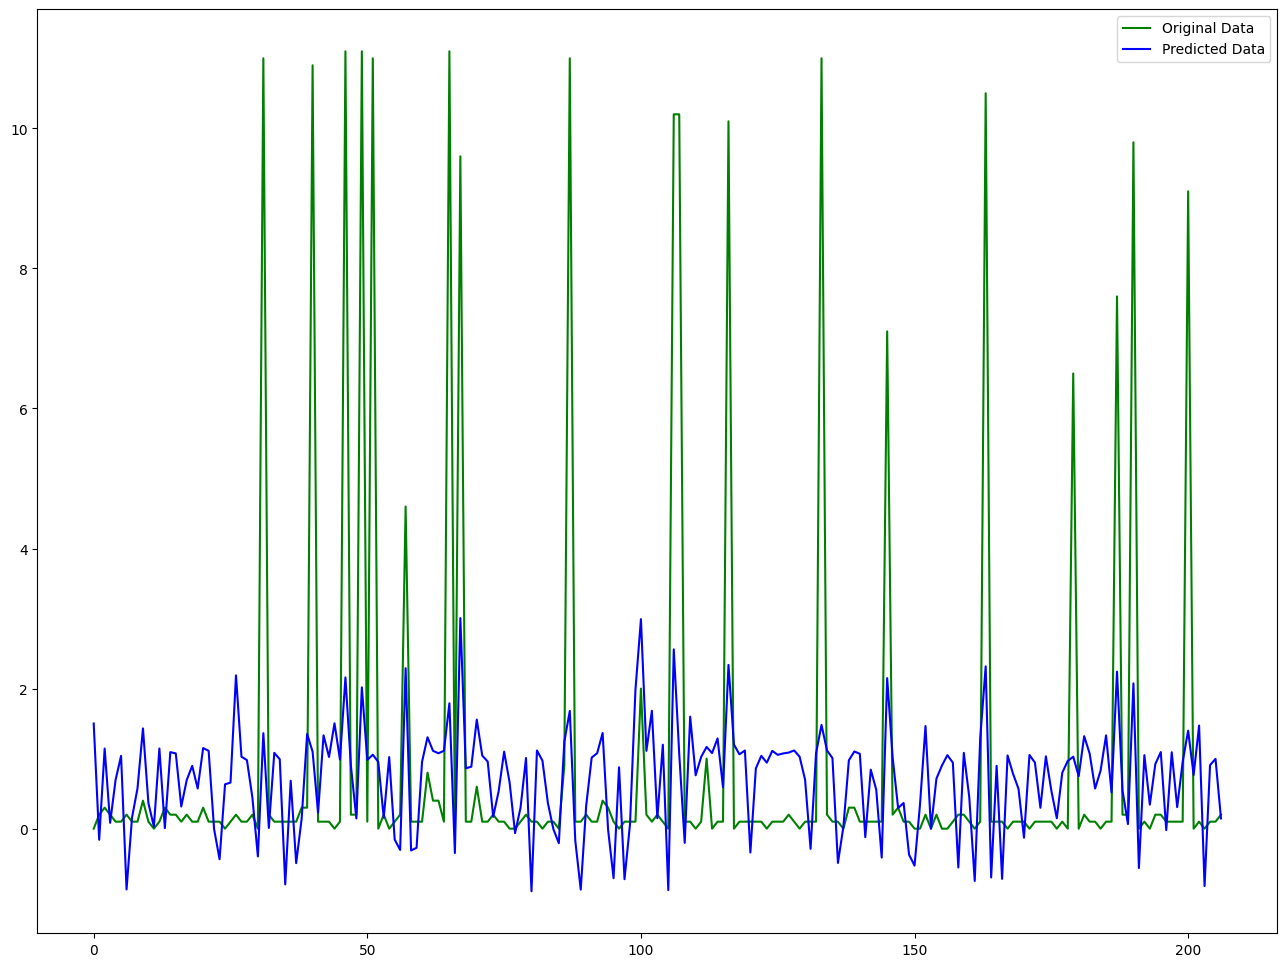

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
labels = ['Original Data', 'Predicted Data']
plt.plot(y_test, color = 'green', label = 'Original Data')
plt.plot(yhat, color = 'blue', label = 'Predicted Data')
plt.legend(labels)
plt.show()

In [133]:
import numpy as np
yhat = np.round(yhat,1)
yhat[:5]

array([ 1.5, -0.2,  1.1,  0.1,  0.7])

In [134]:
predicted_vs_real = pd.DataFrame({'Actual': y_test,
                                 'Predicted': yhat})

predicted_vs_real

Actual  Predicted
0       0.0        1.5
1       0.2       -0.2
2       0.3        1.1
3       0.2        0.1
4       0.1        0.7
..      ...        ...
202     0.1        1.5
203     0.0       -0.8
204     0.1        0.9
205     0.1        1.0
206     0.2        0.1

[207 rows x 2 columns]

In [135]:
predicted_vs_real['difference'] = predicted_vs_real['Actual'] - predicted_vs_real['Predicted']
predicted_vs_real

Actual  Predicted  difference
0       0.0        1.5        -1.5
1       0.2       -0.2         0.4
2       0.3        1.1        -0.8
3       0.2        0.1         0.1
4       0.1        0.7        -0.6
..      ...        ...         ...
202     0.1        1.5        -1.4
203     0.0       -0.8         0.8
204     0.1        0.9        -0.8
205     0.1        1.0        -0.9
206     0.2        0.1         0.1

[207 rows x 3 columns]

In [136]:
rounded_difference = predicted_vs_real['difference'].tolist()
rounded_difference = np.round(rounded_difference,0)

In [137]:
predicted_vs_real['Rounded Difference'] = rounded_difference
predicted_vs_real

Actual  Predicted  difference  Rounded Difference
0       0.0        1.5        -1.5                -2.0
1       0.2       -0.2         0.4                 0.0
2       0.3        1.1        -0.8                -1.0
3       0.2        0.1         0.1                 0.0
4       0.1        0.7        -0.6                -1.0
..      ...        ...         ...                 ...
202     0.1        1.5        -1.4                -1.0
203     0.0       -0.8         0.8                 1.0
204     0.1        0.9        -0.8                -1.0
205     0.1        1.0        -0.9                -1.0
206     0.2        0.1         0.1                 0.0

[207 rows x 4 columns]

In [138]:
predicted_vs_real['Rounded Difference'].value_counts()

Rounded Difference
-1.0     99
 0.0     68
 1.0     15
-2.0      6
 9.0      5
 8.0      5
 10.0     4
 5.0      2
 2.0      1
 7.0      1
 6.0      1
Name: count, dtype: int64

In [139]:
anamolies = predicted_vs_real[(predicted_vs_real['Rounded Difference']>= 6) |(predicted_vs_real['Rounded Difference']<= -6)] 
anamolies

Actual  Predicted  difference  Rounded Difference
31     11.0        1.4         9.6                10.0
40     10.9        1.1         9.8                10.0
46     11.1        2.2         8.9                 9.0
49     11.1        2.0         9.1                 9.0
51     11.0        1.1         9.9                10.0
65     11.1        1.8         9.3                 9.0
67      9.6        3.0         6.6                 7.0
87     11.0        1.7         9.3                 9.0
106    10.2        2.6         7.6                 8.0
107    10.2        1.1         9.1                 9.0
116    10.1        2.3         7.8                 8.0
133    11.0        1.5         9.5                10.0
163    10.5        2.3         8.2                 8.0
179     6.5        1.0         5.5                 6.0
190     9.8        2.1         7.7                 8.0
200     9.1        1.4         7.7                 8.0

In [140]:
len(x_test)

207

In [141]:
x_test.reset_index(inplace = True)

In [142]:
x_test.drop('index', axis = 1, inplace = True)

In [143]:
x_test

LAT  hour  Cargo    COG
0    29.93984    22   31.0  278.6
1    29.88120     3   31.0  195.3
2    29.94057    20   31.0  146.0
3    29.88105     5   31.0   14.3
4    29.88106     8   31.0  148.3
..        ...   ...    ...    ...
202  29.88147    14   31.0  297.3
203  29.88099     0   31.0  190.2
204  29.88143    10   31.0  228.7
205  29.88134    13   31.0   59.4
206  29.88131     4   31.0  153.9

[207 rows x 4 columns]

In [144]:
anamolies_indices = anamolies.index.tolist()
anamolies_indices

[31, 40, 46, 49, 51, 65, 67, 87, 106, 107, 116, 133, 163, 179, 190, 200]

In [145]:
x_test.iloc[anamolies_indices]

LAT  hour  Cargo    COG
31   29.91675    18   31.0  243.1
40   29.86578    17   31.0   78.9
46   29.95925    18   31.0  272.3
49   29.90318    17   31.0  340.3
51   29.86596    17   31.0  103.1
65   29.91119    18   31.0  289.0
67   29.92131    18   31.0  355.8
87   29.90931    18   31.0  281.2
106  29.88165    17   31.0  358.0
107  29.87582    17   31.0   18.0
116  29.94616    18   31.0  305.6
133  29.90869    18   31.0  265.2
163  29.95274    18   31.0  292.5
179  29.87697    17   31.0  131.8
190  29.91607    18   31.0  323.8
200  29.93896    19   31.0  228.0

## **The above Rows are Vessels with Anomalies** ##